# Programa de Pós-Graduação em Computação Aplicada (UnB)
## Disciplina: ANÁLISE ESTATÍSTICA DE DADOS E INFORMAÇÕES - Turma 01 - 2023/1
## Professor: João Gabriel de Moraes Souza
## Aluno: Francisco Gonçalves de Araújo Filho
## Matrícula: 231109675
### Tarefa 4
Você é um analista financeiro de uma grande corretora de investimentos. Essa corretora pede que você adquira os dados de 5 ações da bolsa de valores de São Paulo - B3 – e o índice que a compõe. As cinco ações escolhidas ficarão a seu critério. Levando-se em consideração os dados de 5 ações da bolsa de valores de São Paulo - B3 - e o índice que a compõe da Tarefa 2. Os gestores da corretora pedem a você analista de investimentos que elabore os seguintes tópicos:

### **Questão a)** 
O Capital Asset Price Model (CAPM) de duas ações escolhidas da base de dados
de 5 ações elaboradas em exercícios anteriores T2 e T3. Encontre os valores preditos
dessas ações e explique o resultado. Dica: Use como taxa livre de risco a Taxa DI extraída do pacote Quandl. (50%)


In [1]:
# Importanto bibliotecas necessárias
import pandas as pd
import numpy as np
import yfinance as yf
import math
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
from scipy import stats
from scipy import optimize
from statsmodels.compat import lzip
import statsmodels.api as sm
from statsmodels.formula.api import ols
from bioinfokit.analys import stat
from scipy.stats import mannwhitneyu
from sklearn.linear_model import LinearRegression

Montou-se uma carteira de ações ligadas ao agronegócio.

In [2]:
# Selecionando as 5 ações (Agronegócio) e o índice IBOVESPA
# Baixando os dados de fechamento
lista_acoes = ['JBSS3.SA', 'SUZB3.SA', 'SLCE3.SA', 'CSAN3.SA', 'BEEF3.SA', '^BVSP']
acoes = lista_acoes
acoes_df = pd.DataFrame()
for acao in acoes:
    acoes_df[acao] = yf.download(acao,
            start='2012-01-01', end='2023-05-09')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
acoes_df.reset_index(inplace=True)
acoes_df

Date   JBSS3.SA   SUZB3.SA   SLCE3.SA   CSAN3.SA  BEEF3.SA  \
0    2012-01-02   5.620000  20.010000   6.524793   5.932352  5.113132   
1    2012-01-03   5.790000  20.010000   6.487603   6.016783  5.162297   
2    2012-01-04   5.900000  20.010000   6.483471   6.045667  5.113132   
3    2012-01-05   6.000000  20.010000   6.384297   6.094547  4.975471   
4    2012-01-06   6.070000  20.010000   6.404958   6.021226  4.955805   
...         ...        ...        ...        ...        ...       ...   
2810 2023-05-02  17.389999  40.680000  39.290909  14.510000  8.220000   
2811 2023-05-03  17.629999  40.099998  39.863636  14.410000  8.500000   
2812 2023-05-04  17.950001  39.599998  39.281818  14.210000  8.440000   
2813 2023-05-05  18.280001  41.610001  38.518181  14.760000  8.810000   
2814 2023-05-08  17.799999  41.869999  35.900002  15.260000  9.000000   

         ^BVSP  
0          NaN  
1      59265.0  
2      59365.0  
3      58546.0  
4      58600.0  
...        ...  
2810  101927.0  
2811  101797.0  
2812  102174.0  
2813  105148.0  
2814  106042.0  

[2815 rows x 7 columns]

In [4]:
# Printa histórico de preços das ações escolhidas
acoes = acoes_df.copy()
acoes.drop(labels = ['^BVSP'], axis=1, inplace=True)
figura = px.line(title = 'Histórico do preço das ações')
for i in acoes.columns[1:]:
  figura.add_scatter(x = acoes["Date"] ,y = acoes[i], name = i)
figura.show()

#### Calcula Taxa de Retorno das Ações e imprime histórico.

In [5]:
dataset = acoes_df.copy()
dataset.drop(labels = ['Date'], axis=1, inplace=True)
taxas_retorno = np.log(dataset / dataset.shift(1))
dataset_date = acoes_df.copy()
date = dataset_date.filter(["Date"])
taxas_retorno = pd.concat([date, taxas_retorno], axis=1)
taxas_retorno

Date  JBSS3.SA  SUZB3.SA  SLCE3.SA  CSAN3.SA  BEEF3.SA     ^BVSP
0    2012-01-02       NaN       NaN       NaN       NaN       NaN       NaN
1    2012-01-03  0.029801  0.000000 -0.005716  0.014132  0.009569       NaN
2    2012-01-04  0.018820  0.000000 -0.000637  0.004789 -0.009569  0.001686
3    2012-01-05  0.016807  0.000000 -0.015415  0.008053 -0.027292 -0.013892
4    2012-01-06  0.011599  0.000000  0.003231 -0.012104 -0.003960  0.000922
...         ...       ...       ...       ...       ...       ...       ...
2810 2023-05-02 -0.028905  0.021870 -0.006458 -0.031878 -0.039361 -0.024279
2811 2023-05-03  0.013707 -0.014360  0.014471 -0.006916  0.033496 -0.001276
2812 2023-05-04  0.017988 -0.012547 -0.014703 -0.013976 -0.007084  0.003697
2813 2023-05-05  0.018217  0.049511 -0.019631  0.037975  0.042905  0.028692
2814 2023-05-08 -0.026609  0.006229 -0.070393  0.033314  0.021337  0.008466

[2815 rows x 7 columns]

In [6]:
figura = px.line(title = 'Histórico do retorno das ações')
log_ret_acoes = taxas_retorno.copy()
for i in log_ret_acoes.columns[1:]:
    figura.add_scatter(x = log_ret_acoes['Date'], y = log_ret_acoes[i], name = i)
    figura.add_hline(y = log_ret_acoes[i].mean(), line_color="green", line_dash="dot", )
figura.show()

In [7]:
# Imprime informações resumidas sobre as medidas centrais, 
# dispersão e forma da distribuição das taxas de retorno
taxas_retorno.describe()

JBSS3.SA     SUZB3.SA     SLCE3.SA     CSAN3.SA     BEEF3.SA  \
count  2814.000000  2814.000000  2814.000000  2814.000000  2814.000000   
mean      0.000410     0.000262     0.000606     0.000336     0.000201   
std       0.029688     0.018349     0.022708     0.022367     0.024773   
min      -0.376051    -0.175912    -0.111226    -0.203794    -0.205485   
25%      -0.015933     0.000000    -0.012009    -0.012774    -0.013293   
50%       0.000000     0.000000     0.000000     0.000202     0.000000   
75%       0.015962     0.000000     0.013162     0.012847     0.013245   
max       0.219915     0.197168     0.125769     0.133300     0.167054   

             ^BVSP  
count  2797.000000  
mean      0.000185  
std       0.015698  
min      -0.159930  
25%      -0.008229  
50%       0.000273  
75%       0.008995  
max       0.130223

In [8]:
# Imprime a média das taxas de retorno
warnings.filterwarnings("ignore")
taxas_retorno.mean()*100

JBSS3.SA    0.040969
SUZB3.SA    0.026238
SLCE3.SA    0.060594
CSAN3.SA    0.033575
BEEF3.SA    0.020093
^BVSP       0.018519
dtype: float64

In [9]:
# Imprime o desvio padrão das taxas de retorno
dataset = taxas_retorno.copy()
dataset.drop(labels = ['Date'], axis=1, inplace=True)
dataset.std()*100

JBSS3.SA    2.968839
SUZB3.SA    1.834948
SLCE3.SA    2.270790
CSAN3.SA    2.236725
BEEF3.SA    2.477316
^BVSP       1.569774
dtype: float64

<Axes: >

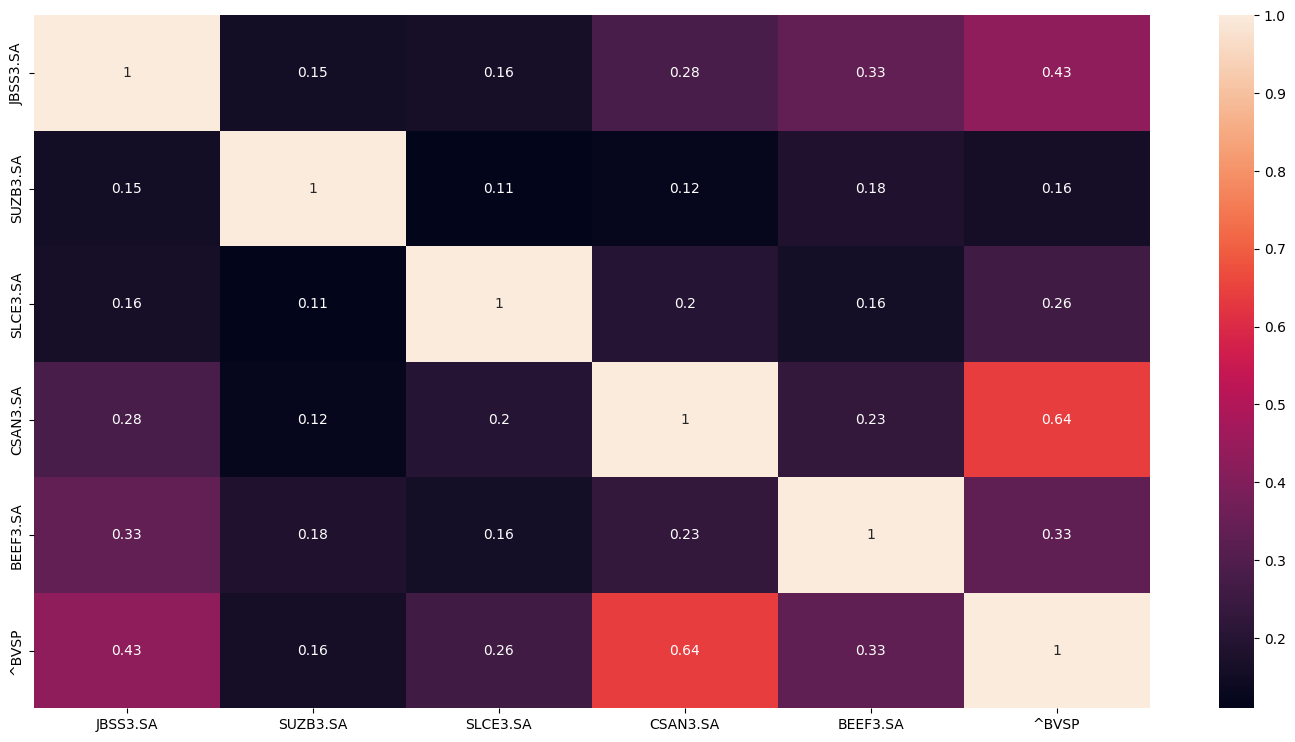

In [10]:
# Realiza uma análise de correlação entre as taxas de retorno das ações 
# e gera um mapa de calor (heatmap) para visualizar os resultados
taxas_retorno_corr = taxas_retorno.copy()
taxas_retorno_corr.drop(labels = ['Date'], axis=1, inplace=True)
taxas_retorno_corr.corr()
plt.figure(figsize=(18,9))
sns.heatmap(taxas_retorno.corr(), annot=True)

#### Mapa de calor - correlação entre ações e índice BOVESPA
O mapa de calor da correlação entre os elementos das taxas de retorno das ações.
É possível perceber que a ação que tem maior correlação com o índice BOVESPA é 
CSAN3, enquanto que tem menor correlação é a ação SUZB3.
Entre as ações aquelas que possuem maior correlação são JBSS3.SA e BEEF3.SA, talvez por terem o mesmo ramo de atividade.
Percebe-se também, pela predominância de cores mais escuras, que a correlação entre as ações é baixa,
que é uma característica desejável em uma carteira de ações porque ela pode reduzir o risco e aumentar a eficiência da carteira.

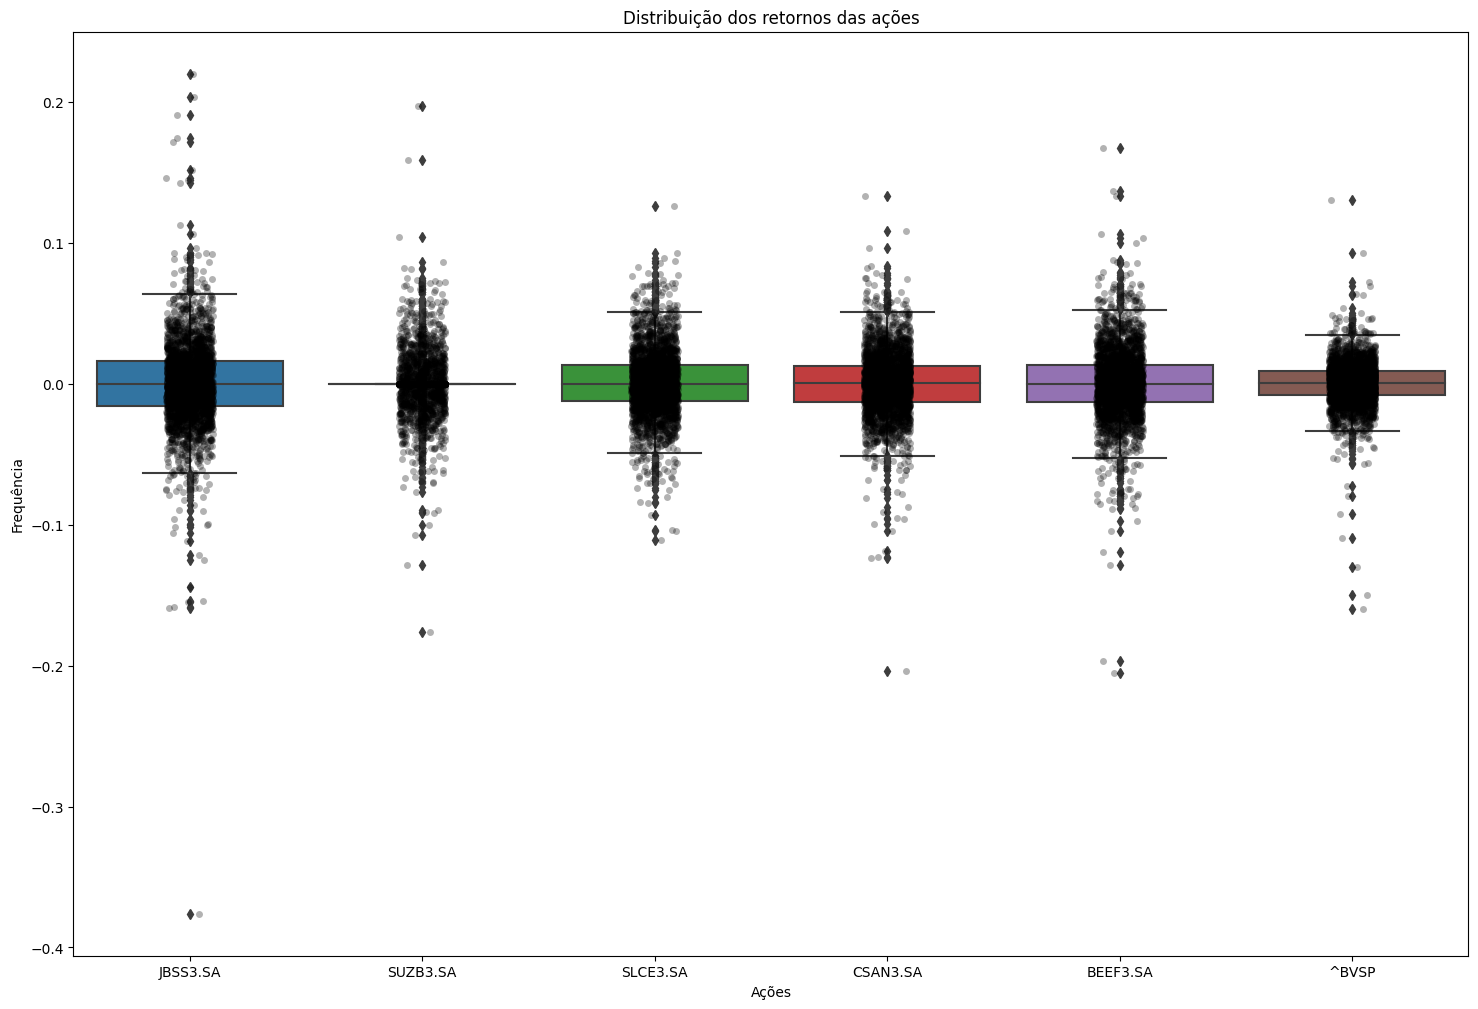

In [11]:
df = pd.DataFrame(data=taxas_retorno_corr, columns=lista_acoes)
plt.figure(figsize=(18,12))
figure = sns.boxplot(x="variable", y="value", data=pd.melt(df), 
                      order=lista_acoes)
figure = sns.stripplot(x="variable", y="value", data=pd.melt(df), marker="o", 
                       alpha=0.3, color="black", 
                       order=lista_acoes)
figure.axes.set_title("Distribuição dos retornos das ações")
figure.set_xlabel("Ações")
figure.set_ylabel("Frequência")
plt.show()

#### Distribuição dos retornos das ações
O gráfico de boxplot acima mostra a distribuição dos retornos das ações para o conjunto de ações selecionadas. 
Ao observar as caixas percebe-se uma distribuição simétrica no intervalo interquartil. 
Percebe-se que, especificamente, para a ação SUZB3 que os a maioria dos valores observados de seu retono tem valores 0, 
já que, pelo histórico de preços acima plotado, a ação passou a ser comercializada próximo do início de 2018

#### Regressão Linear - CAPM
Para a realização do O Capital Asset Price Model (CAPM) foram escolhidas as asções **JBSS3.SA** e **SLCE3.SA**

In [12]:
# Filtrando ação JBSS3.SA
dataset = taxas_retorno.copy()
dataset = taxas_retorno.filter(['Date','JBSS3.SA', '^BVSP']) 
dataset


Date  JBSS3.SA     ^BVSP
0    2012-01-02       NaN       NaN
1    2012-01-03  0.029801       NaN
2    2012-01-04  0.018820  0.001686
3    2012-01-05  0.016807 -0.013892
4    2012-01-06  0.011599  0.000922
...         ...       ...       ...
2810 2023-05-02 -0.028905 -0.024279
2811 2023-05-03  0.013707 -0.001276
2812 2023-05-04  0.017988  0.003697
2813 2023-05-05  0.018217  0.028692
2814 2023-05-08 -0.026609  0.008466

[2815 rows x 3 columns]

In [13]:
# Filtrando ação SLCE3.SA
dataset_2 = taxas_retorno.copy()
dataset_2 = taxas_retorno.filter(['Date','SLCE3.SA', '^BVSP']) 
dataset_2

Date  SLCE3.SA     ^BVSP
0    2012-01-02       NaN       NaN
1    2012-01-03 -0.005716       NaN
2    2012-01-04 -0.000637  0.001686
3    2012-01-05 -0.015415 -0.013892
4    2012-01-06  0.003231  0.000922
...         ...       ...       ...
2810 2023-05-02 -0.006458 -0.024279
2811 2023-05-03  0.014471 -0.001276
2812 2023-05-04 -0.014703  0.003697
2813 2023-05-05 -0.019631  0.028692
2814 2023-05-08 -0.070393  0.008466

[2815 rows x 3 columns]

In [14]:
# Baixando Taxa DI extraída do pacote Quandl
import quandl

api_key = "B1qb2AMsu2PDkEt-2jfD"
start_date = '2012-01-01'
end_date = '2023-05-09'

# Chave da API Quandl
quandl.ApiConfig.api_key = api_key
# Dados da taxa DI
df = quandl.get("BCB/11", start_date=start_date, end_date=end_date)

# Acrescenta nome a colula
#change column name
df.columns = ['Taxa DI']
df.reset_index(inplace=True)
df

Date   Taxa DI
0    2012-01-02  0.041063
1    2012-01-03  0.041063
2    2012-01-04  0.041063
3    2012-01-05  0.041063
4    2012-01-06  0.041063
...         ...       ...
2845 2023-05-03  0.050788
2846 2023-05-04  0.050788
2847 2023-05-05  0.050788
2848 2023-05-08  0.050788
2849 2023-05-09  0.050788

[2850 rows x 2 columns]

In [15]:
# Calcula a taxa de juros diária equivalente composta
# Fazendo equivalência de taxas de ano para dia -> 
# deve-se fazer a raiz enésima da taxa. Como no exemplo é anual raiz 256-esíma da taxa
df['Taxa DI'] = df['Taxa DI'].apply(lambda x: (1 + x)**(1/252) - 1)
df

Date   Taxa DI
0    2012-01-02  0.000160
1    2012-01-03  0.000160
2    2012-01-04  0.000160
3    2012-01-05  0.000160
4    2012-01-06  0.000160
...         ...       ...
2845 2023-05-03  0.000197
2846 2023-05-04  0.000197
2847 2023-05-05  0.000197
2848 2023-05-08  0.000197
2849 2023-05-09  0.000197

[2850 rows x 2 columns]

In [16]:
# Compoe um único Dataset para primeira ação
dataset['Date'] = pd.to_datetime(dataset['Date'])
df['Date'] = pd.to_datetime(df['Date'])
# merge the two DataFrames on the 'Date' column
dataset = pd.merge(dataset, df, on='Date')
dataset = dataset.set_index('Date')
dataset

JBSS3.SA     ^BVSP   Taxa DI
Date                                    
2012-01-02       NaN       NaN  0.000160
2012-01-03  0.029801       NaN  0.000160
2012-01-04  0.018820  0.001686  0.000160
2012-01-05  0.016807 -0.013892  0.000160
2012-01-06  0.011599  0.000922  0.000160
...              ...       ...       ...
2023-05-02 -0.028905 -0.024279  0.000197
2023-05-03  0.013707 -0.001276  0.000197
2023-05-04  0.017988  0.003697  0.000197
2023-05-05  0.018217  0.028692  0.000197
2023-05-08 -0.026609  0.008466  0.000197

[2809 rows x 3 columns]

In [17]:
# Compoe um único Dataset para Segunda ação
dataset_2['Date'] = pd.to_datetime(dataset_2['Date'])
df['Date'] = pd.to_datetime(df['Date'])
# merge the two DataFrames on the 'Date' column
dataset_2 = pd.merge(dataset_2, df, on='Date')
dataset_2 = dataset_2.set_index('Date')
dataset_2

SLCE3.SA     ^BVSP   Taxa DI
Date                                    
2012-01-02       NaN       NaN  0.000160
2012-01-03 -0.005716       NaN  0.000160
2012-01-04 -0.000637  0.001686  0.000160
2012-01-05 -0.015415 -0.013892  0.000160
2012-01-06  0.003231  0.000922  0.000160
...              ...       ...       ...
2023-05-02 -0.006458 -0.024279  0.000197
2023-05-03  0.014471 -0.001276  0.000197
2023-05-04 -0.014703  0.003697  0.000197
2023-05-05 -0.019631  0.028692  0.000197
2023-05-08 -0.070393  0.008466  0.000197

[2809 rows x 3 columns]

In [18]:
# Compoe o dataset da Ação 1 com o PmR = Prémio de Risco
dataset['pmr'] = dataset['^BVSP'] - dataset['Taxa DI']
dataset[np.isnan(dataset)] = 0
dataset

JBSS3.SA     ^BVSP   Taxa DI       pmr
Date                                              
2012-01-02  0.000000  0.000000  0.000160  0.000000
2012-01-03  0.029801  0.000000  0.000160  0.000000
2012-01-04  0.018820  0.001686  0.000160  0.001526
2012-01-05  0.016807 -0.013892  0.000160 -0.014052
2012-01-06  0.011599  0.000922  0.000160  0.000762
...              ...       ...       ...       ...
2023-05-02 -0.028905 -0.024279  0.000197 -0.024476
2023-05-03  0.013707 -0.001276  0.000197 -0.001473
2023-05-04  0.017988  0.003697  0.000197  0.003500
2023-05-05  0.018217  0.028692  0.000197  0.028495
2023-05-08 -0.026609  0.008466  0.000197  0.008270

[2809 rows x 4 columns]

In [19]:
# Compoe o dataset da Ação 1 com o PmR = Prémio de Risco
dataset_2['pmr'] = dataset_2['^BVSP'] - dataset_2['Taxa DI']
dataset_2[np.isnan(dataset_2)] = 0
dataset_2

SLCE3.SA     ^BVSP   Taxa DI       pmr
Date                                              
2012-01-02  0.000000  0.000000  0.000160  0.000000
2012-01-03 -0.005716  0.000000  0.000160  0.000000
2012-01-04 -0.000637  0.001686  0.000160  0.001526
2012-01-05 -0.015415 -0.013892  0.000160 -0.014052
2012-01-06  0.003231  0.000922  0.000160  0.000762
...              ...       ...       ...       ...
2023-05-02 -0.006458 -0.024279  0.000197 -0.024476
2023-05-03  0.014471 -0.001276  0.000197 -0.001473
2023-05-04 -0.014703  0.003697  0.000197  0.003500
2023-05-05 -0.019631  0.028692  0.000197  0.028495
2023-05-08 -0.070393  0.008466  0.000197  0.008270

[2809 rows x 4 columns]

#### Disperção da Relação PmR (Prêmio de Risco) X Retorno das ações
Os gráficos a seguir mostram a dispersão (scatter plot) com o eixo x representando o Prêmio de Risco (pmr) 
e o eixo y representando o retorno das ações selecionadas. 
O Prêmio de Risco é calculado como a diferença entre o retorno do índice '^BVSP' e a Taxa DI (taxa livre de risco).

Cada ponto no gráfico representa um par de valores (pmr, retorno da ação) para um determinado período. 
O eixo x mostra a variação do Prêmio de Risco, enquanto o eixo y mostra a variação do retorno das ações.

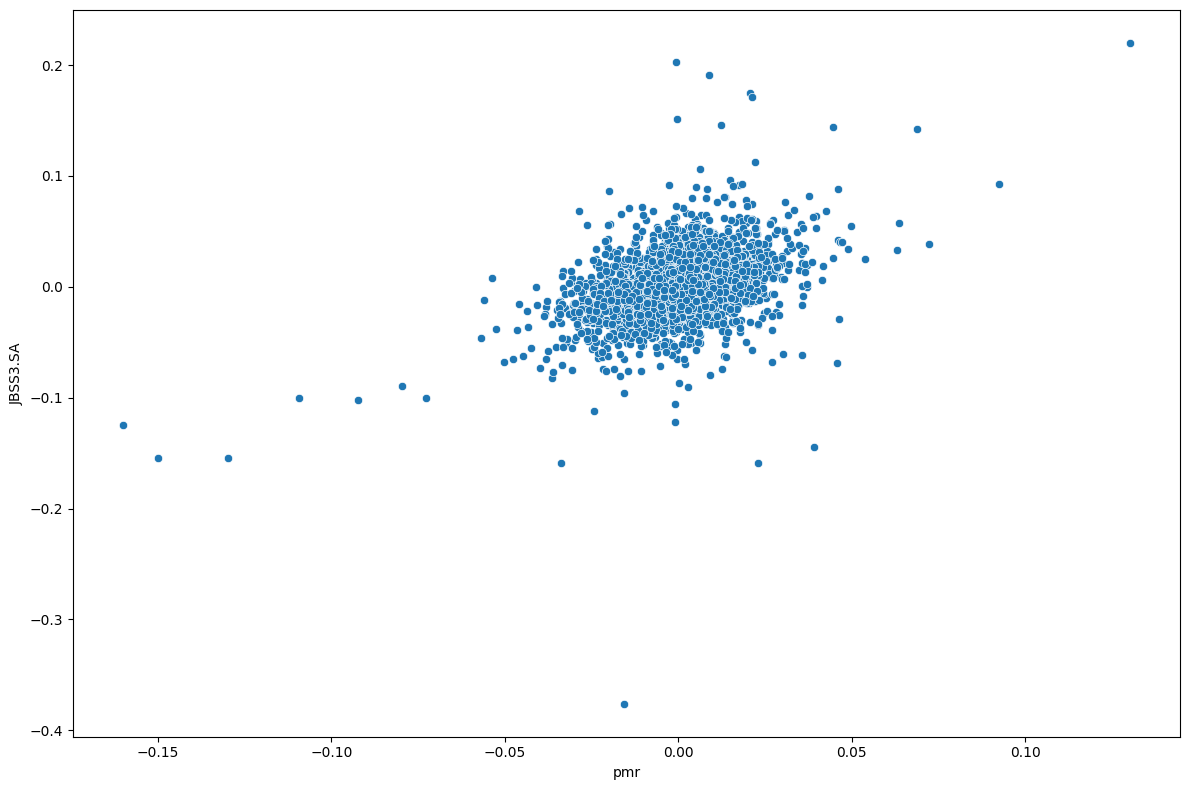

In [20]:
# Disperção PmR para ação 1
y = dataset['JBSS3.SA'] # variável dependente
x = dataset['pmr'] # Variável independente
plt.figure(figsize=(12, 8), tight_layout=True)
sns.scatterplot(x=x, y=y)
plt.show()

#### Disperção da Relação PmR (Prêmio de Risco) X Retorno Retorno JBSS3.SA
O gráfico acima descreve uma tendência ascendente geral, indicando que um aumento no Prêmio de Risco está associado a um aumento no retorno da ação JBSS3.SA
Além disso, estando os pontos mais agrupados, tem-se uma relação mais consistente entre o Prêmio de Risco e o retorno da ação JBSS3.SA.

#### Regressão Linear OLS
No trecho de código a seguir a biblioteca *statsmodels* é utilizada para realizar uma regressão linear usando a função *sm.OLS()*. O objetivo é ajustar um modelo de regressão linear entre a variável independente x (Prêmio de Risco) e a variável dependente y (retorno da ação 'JBSS3.SA').

A primeira linha do trecho $x\_with\_mean = sm.add\_constant(x)$ adiciona uma coluna constante ao conjunto de dados x para incluir o termo de interceptação no modelo de regressão.

A próxima linha $x\_with\_mean['Taxa DI'] = dataset['Taxa DI'].mean()$ define o valor médio da coluna 'Taxa DI' como o valor constante para o termo de interceptação. Isso é feito para obter uma previsão mais precisa usando o modelo de regressão.

Em seguida, a função $sm.OLS()$ é chamada para ajustar o modelo de regressão linear, usando a variável dependente y e a matriz de variáveis independentes x_with_mean. O argumento missing='drop' indica que as linhas com valores ausentes devem ser excluídas da análise.

O método $fit()$ é aplicado ao objeto de regressão resultante lm, o qual realiza a estimação dos coeficientes do modelo de regressão.

Por fim, o comando $lm.predict(x\_with\_mean)$ é usado para fazer previsões com base no modelo ajustado. 

**O retorna do método *predict* um array contendo os valores previstos para a variável dependente y, com base nos valores da variável independente *x_with_mean*.**

In [35]:
x_with_mean = sm.add_constant(x)
x_with_mean['Taxa DI'] = dataset['Taxa DI'].mean()
lm = sm.OLS(y, x_with_mean, missing='drop').fit()
lm.predict(x_with_mean)

Date
2012-01-02    0.000367
2012-01-03    0.000367
2012-01-04    0.001613
2012-01-05   -0.011105
2012-01-06    0.000990
                ...   
2023-05-02   -0.019616
2023-05-03   -0.000835
2023-05-04    0.003225
2023-05-05    0.023632
2023-05-08    0.007119
Length: 2809, dtype: float64

In [22]:
# Resumo estatístico do resultado de uma regressão linear 
# ajustada pelo método OLS (Ordinary Least Squares) 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               JBSS3.SA   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     638.2
Date:                Sun, 11 Jun 2023   Prob (F-statistic):          4.74e-127
Time:                        16:22:42   Log-Likelihood:                 6179.2
No. Observations:                2809   AIC:                        -1.235e+04
Df Residuals:                    2807   BIC:                        -1.234e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.001      0.726      0.468      -0.001       0.001
pmr            0.8164      0.032     25.262      0.000       0.753       0.880
Taxa DI     4.849e-08   6.68e-08      0.726      0.468   -8.26e-08     1.8e-07
==============================================================================
Omnibus:                      768.788   Durbin-Watson:                   2.141
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34544.463
Skew:                          -0.521   Prob(JB):                         0.00
Kurtosis:                      20.148   Cond. No.                     8.01e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.38e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Analise do resultado da regreção para JBSS3.SA
Interpretação das Principais Estatísticas:
- **R-quadrado (R-squared)**: O coeficiente de determinação R-quadrado é uma medida da proporção da variância na variável dependente (JBSS3.SA) que pode ser explicada pelas variáveis independentes incluídas no modelo. Nesse caso, o R-quadrado é 0.185, o que significa que aproximadamente 18.5% da variabilidade em JBSS3.SA é explicada pelas variáveis independentes (pmr e Taxa DI) incluídas no modelo;
- **R-quadrado ajustado (Adj. R-squared)**: O R-quadrado ajustado é uma versão penalizada do R-quadrado que leva em consideração o número de variáveis independentes no modelo e o número de observações. Neste caso, o R-quadrado ajustado também é 0.185, indicando que a inclusão das variáveis independentes não melhorou a explicação do modelo;
- **F-statistic**: O valor F e o seu respectivo valor p medem a significância geral do modelo. Nesse caso, o valor F é 638.2 e o valor p é 4.74e-127, indicando que o modelo como um todo é estatisticamente significativo;
- **Coeficientes**: Os coeficientes estimados para cada variável independente são exibidos na tabela. Neste caso, temos os seguintes coeficientes:
    - **const**: 0.0004;
    - **pmr**: 0.8164; 
    - **Taxa DI**: 4.849e-08;
    - **Obs.:** Esses valores representam as estimativas dos coeficientes para as variáveis independentes. Por exemplo, o coeficiente para pmr é 0.8164, o que significa que, para cada aumento unitário em pmr, espera-se um aumento de 0.8164 em JBSS3.SA, mantendo as outras variáveis constantes.
- **Valor p**: Os valores p associados a cada coeficiente indicam a significância estatística desse coeficiente. Um valor p menor que 0.05 geralmente é considerado estatisticamente significativo. Neste caso, o valor p para pmr é 0.000, indicando que é estatisticamente significativo, enquanto o valor p para Taxa DI é 0.468, indicando que não é estatisticamente significativo.
- **Estatísticas Jarque-Bera**: o valor p para o teste Jarque-Bera é 0.00, o que sugere que a distribuição dos resíduos não é normal.

#### Disperção da Relação PmR (Prêmio de Risco) X Retorno Retorno SLCE3.SA

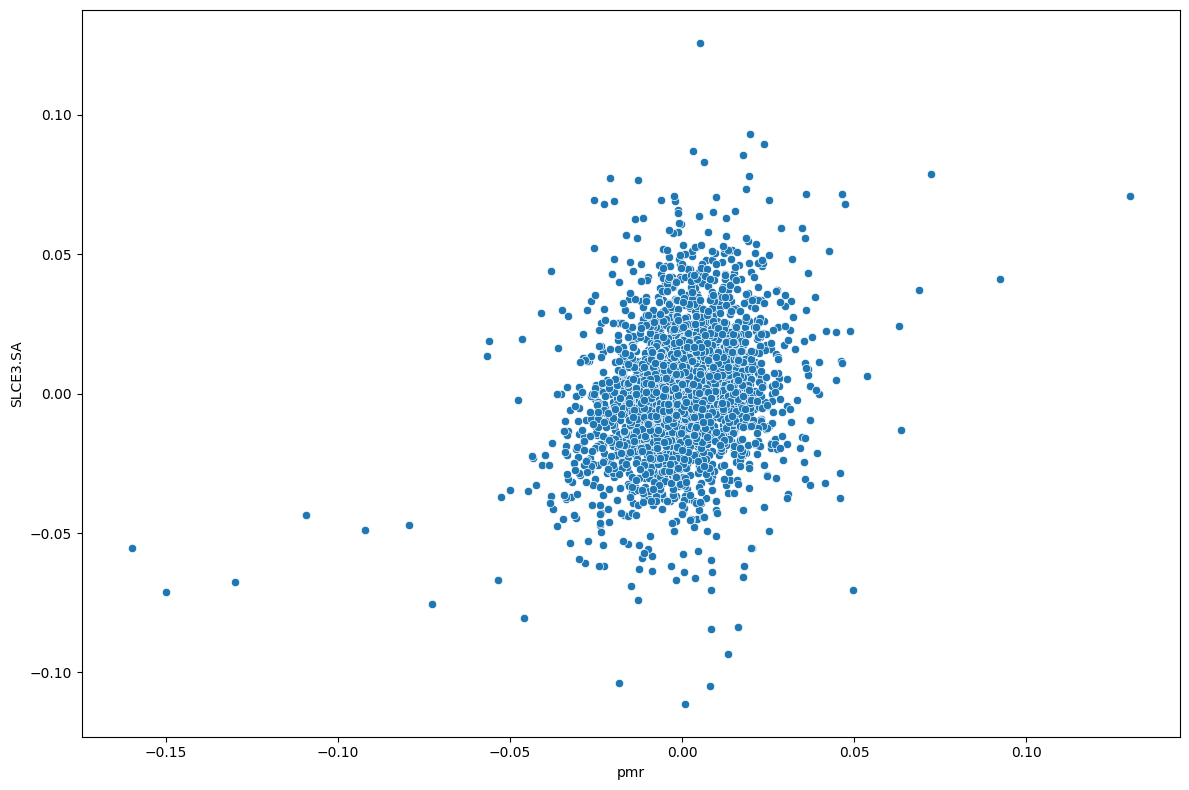

In [27]:
# Disperção PmR para ação 2
y_2 = dataset_2['SLCE3.SA'] # Variável dependente
x_2 = dataset_2['pmr'] # Variável independente
plt.figure(figsize=(12, 8), tight_layout=True)
sns.scatterplot(x=x_2, y=y_2)
plt.show()

#### Disperção da Relação PmR (Prêmio de Risco) X Retorno Retorno SLCE3.SA
O gráfico acima descreve uma tendência ascendente geral, indicando que um aumento no Prêmio de Risco está associado a um aumento no retorno da ação SLCE3.SA
Além disso, estando os pontos mais agrupados, tem-se uma relação mais consistente entre o Prêmio de Risco e o retorno da ação SLCE3.SA

#### Regressão Linear OLS Ação 2
No trecho de código a seguir a biblioteca *statsmodels* é utilizada para realizar uma regressão linear usando a função *sm.OLS()*. O objetivo é ajustar um modelo de regressão linear entre a variável independente x (Prêmio de Risco) e a variável dependente y (retorno da ação 'SLCE3.SA').
Após a executção da regreOs valores previstos para a variável dependente y

In [42]:
x_with_mean_2 = sm.add_constant(x_2)
x_with_mean_2['Taxa DI'] = dataset['Taxa DI'].mean()
lm_2 = sm.OLS(y_2, x_with_mean_2, missing='drop').fit()
lm_2.predict(x_with_mean_2)

Date
2012-01-02    0.000587
2012-01-03    0.000587
2012-01-04    0.001168
2012-01-05   -0.004759
2012-01-06    0.000877
                ...   
2023-05-02   -0.008725
2023-05-03    0.000027
2023-05-04    0.001919
2023-05-05    0.011428
2023-05-08    0.003733
Length: 2809, dtype: float64

In [25]:
# Resumo estatístico do resultado de uma regressão linear 
# ajustada pelo método OLS (Ordinary Least Squares) 
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               SLCE3.SA   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     207.3
Date:                Sun, 11 Jun 2023   Prob (F-statistic):           2.17e-45
Time:                        16:31:31   Log-Likelihood:                 6744.4
No. Observations:                2809   AIC:                        -1.348e+04
Df Residuals:                    2807   BIC:                        -1.347e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.000      1.418      0.156      -0.000       0.001
pmr            0.3805      0.026     14.396      0.000       0.329       0.432
Taxa DI      7.75e-08   5.47e-08      1.418      0.156   -2.97e-08    1.85e-07
==============================================================================
Omnibus:                      143.238   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              492.599
Skew:                           0.125   Prob(JB):                    1.08e-107
Kurtosis:                       5.036   Cond. No.                     8.01e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.38e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Analise do resultado da regreção para SLCE3.SA
Interpretação das Principais Estatísticas:
- **R-quadrado (R-squared)**: É a medida de quanto a variabilidade dos dados é explicada pelo modelo. Nesse caso, o R-squared é 0.069, o que significa que cerca de 6.9% da variabilidade da variável dependente é explicada pelas variáveis independentes do modelo;
- **R-quadrado ajustado (Adj. R-squared)**: O É o R-squared ajustado para o número de variáveis independentes no modelo. Nesse caso, o Adj. R-squared é 0.068;
- **F-statistic**: É o valor do teste F para a significância geral do modelo. Nesse caso, o valor é 207.3, o que indica que o modelo como um todo é estatisticamente significativo;
- **Prob (F-statistic)**: É o valor p associado ao F-statistic. Nesse caso, o valor p é muito baixo (2.17e-45), o que sugere que é altamente improvável que o resultado do F-statistic seja obtido por acaso;
- **Coeficientes**: Os coeficientes estimados para cada variável independente são exibidos na tabela. Neste caso, temos os seguintes coeficientes:
    - **const**: 0.0006;
    - **pmr**: 0.3805; 
    - **Taxa DI**: 7.75e-08;
    - **Obs.:** Esses valores representam as estimativas dos coeficientes para as variáveis independentes. Por exemplo, o coeficiente para pmr é 0.3805, o que significa que, para cada aumento unitário em pmr, espera-se um aumento de 0.3805 em SLCE3.SA, mantendo as outras variáveis constantes.
- **Valor p**: Os valores p associados a cada coeficiente indicam a significância estatística desse coeficiente. Um valor p menor que 0.05 geralmente é considerado estatisticamente significativo. Neste caso, o valor p para pmr é 0.000, indicando que é estatisticamente significativo, enquanto o valor p para Taxa DI é 0.156, indicando que não é estatisticamente significativo.
- **Estatísticas Jarque-Bera**: o valor p para o teste Jarque-Bera é proximo de 0.00, o que sugere que o valor p extremamente baixo (praticamente zero) indica forte evidência contra a hipótese nula de que os dados seguem uma distribuição normal.

### **Questão b)** 
b) Faça os testes devidos e explique os resultados da Regressão Linear feita pelos
modelos CAPM rodados no item (a). Preocupa-se em explicar a parte teórica de
distribuições de probabilidades e pressupostos de regressão linear. (50%)


#### Matriz de gráficos de dispersão Ação 1

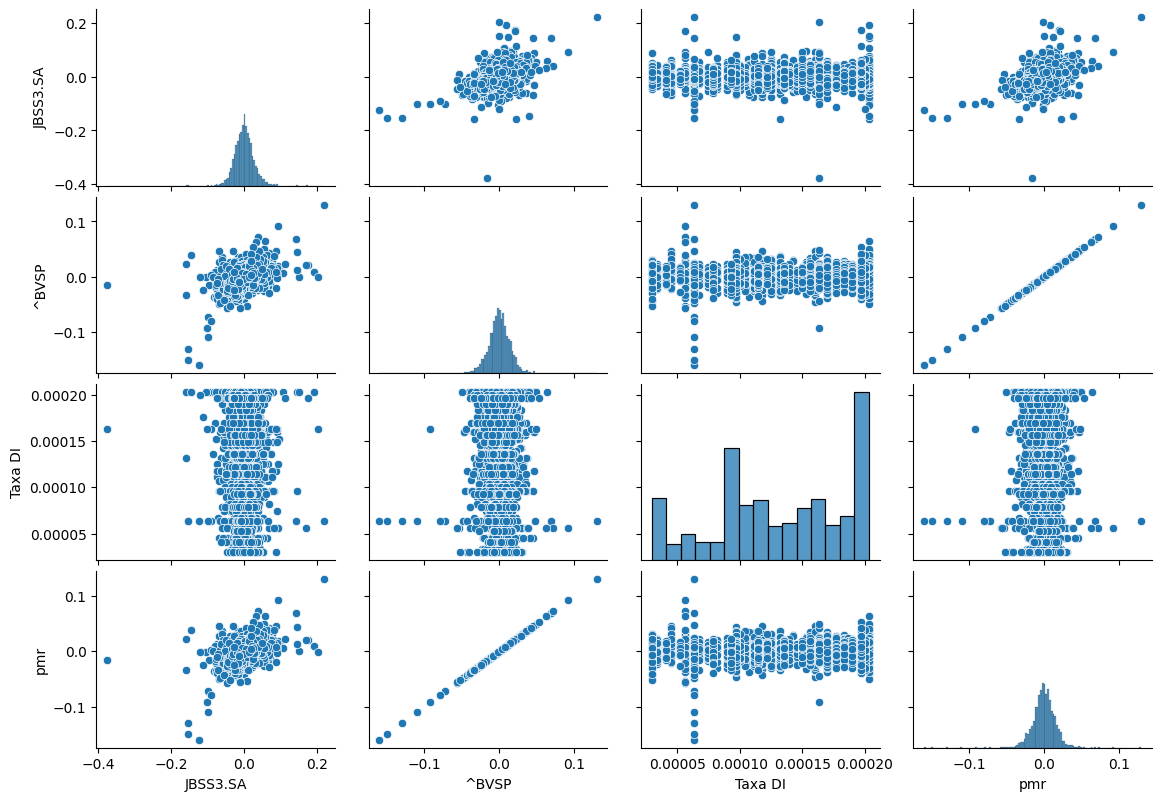

In [26]:
figure = sns.pairplot(dataset)
figure.fig.set_size_inches(12,8)

#### Matriz de gráficos de dispersão Ação 1
O gráfico acima usa o método pairplot do Seaborn para criar uma matriz de gráficos de dispersão (scatter plots) e histogramas das variáveis em um DataFrame. Ele mostra a relação entre todas as combinações possíveis de variáveis, permitindo uma visualização rápida das associações entre os pares de variáveis.

Percebe-se claramente que a variação da Taxa DI é muito espaçada comparada com a variação da ação JBSS3.SA

#### Gráfico de influência nos resultados da regressão da Ação 1

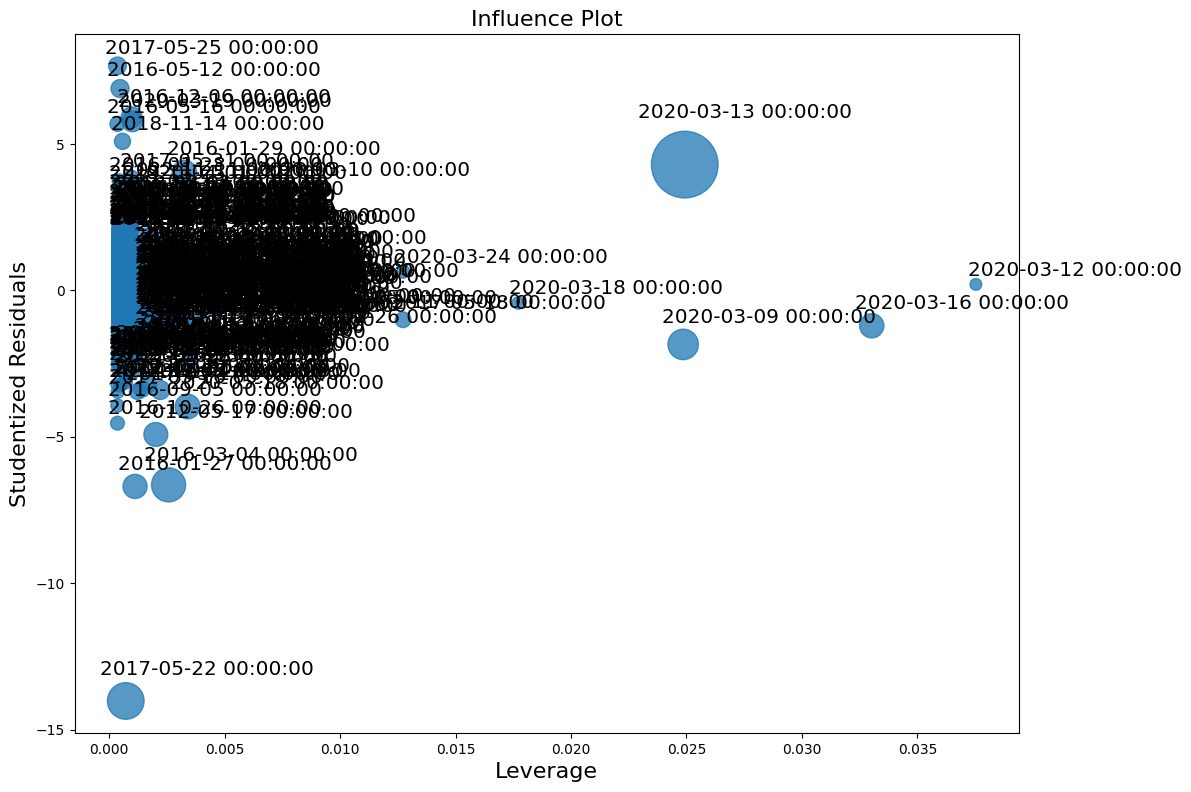

In [28]:
fig = sm.graphics.influence_plot(lm, criterion="cooks")
fig.set_size_inches(12, 8)
plt.tight_layout(pad=1.0)

#### Gráfico de influência nos resultados da regressão da Ação 1
O gráfico de influência exibe pontos que representam as observações no eixo horizontal e a influência dessas observações nos resultados da regressão no eixo vertical. A influência de uma observação é medida pelo valor da estatística de distância de Cook (Cook's distance). Quanto maior o valor de Cook's distance, maior é a influência da observação nos resultados da regressão.

No gráfico, as observações são representadas pelos pontos e seus tamanhos são proporcionais aos valores de Cook's distance. Portanto, **os pontos maiores indicam observações mais influentes**.

#### Gráfico Gráficos de Regressão Parcial (Partial Regression Plot Grid) ação 1

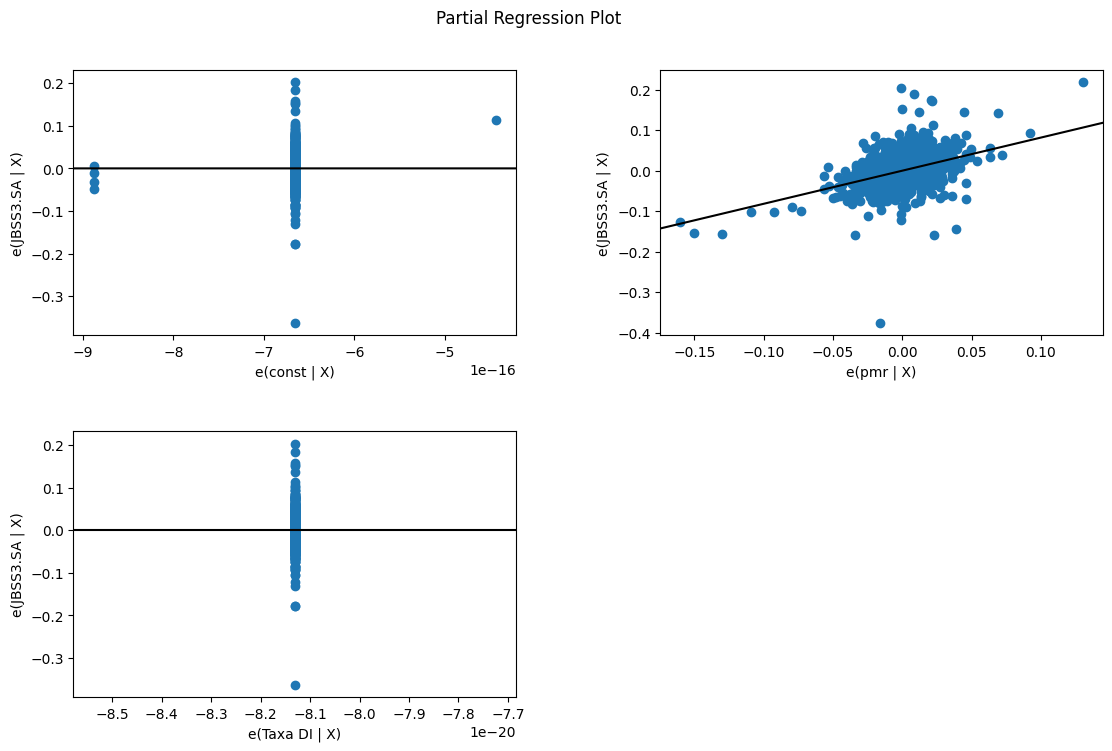

In [29]:
fig = sm.graphics.plot_partregress_grid(lm)
fig.tight_layout(pad=1.0)
fig.set_size_inches(12,8)

#### Gráfico Gráficos de Regressão Parcial (Partial Regression Plot Grid) ação 1
O código acima *fig = sm.graphics.plot_partregress_grid(lm)* gera o Grid de Gráficos de Regressão Parcial (Partial Regression Plot Grid) para o modelo de regressão linear ajustado *lm*, usando a função *plot_partregress_grid* do pacote *statsmodels.graphics*. Cada gráfico mostra a relação parcial entre a variável dependente e uma variável independente específica, controlando os efeitos das outras variáveis independentes.

Analisando cada gráfico temos:

- Gráfico 1:
    - Eixo horizontal: Variável const (constante)
    - Eixo vertical: Variável dependente JBSS3.SA
    - O gráfico mostra a relação parcial entre a variável dependente e a constante do modelo. Como a constante representa o intercepto da regressão, esse gráfico representa a reta de regressão quando todas as variáveis independentes são iguais a zero.

- Gráfico 2:
    -  Eixo horizontal: Variável pmr
    - Eixo vertical: Variável dependente JBSS3.SA
    - O gráfico mostra a relação parcial entre a variável dependente JBSS3.SA e a variável pmr. Ele mostra como a variável pmr afeta a variável dependente, controlando os efeitos das outras variáveis independentes. O coeficiente de regressão associado a pmr pode ser interpretado como o aumento esperado na variável dependente para cada unidade de aumento em pmr.

- Gráfico 3:
    - Eixo horizontal: Variável Taxa DI
    - Eixo vertical: Variável dependente JBSS3.SA
    - O gráfico mostra a relação parcial entre a variável dependente JBSS3.SA e a variável Taxa DI. Ele representa como a variável Taxa DI influencia a variável dependente, controlando os efeitos das outras variáveis independentes.

#### Gráficos da relação entre "pmr" e "JBSS3.SA" 

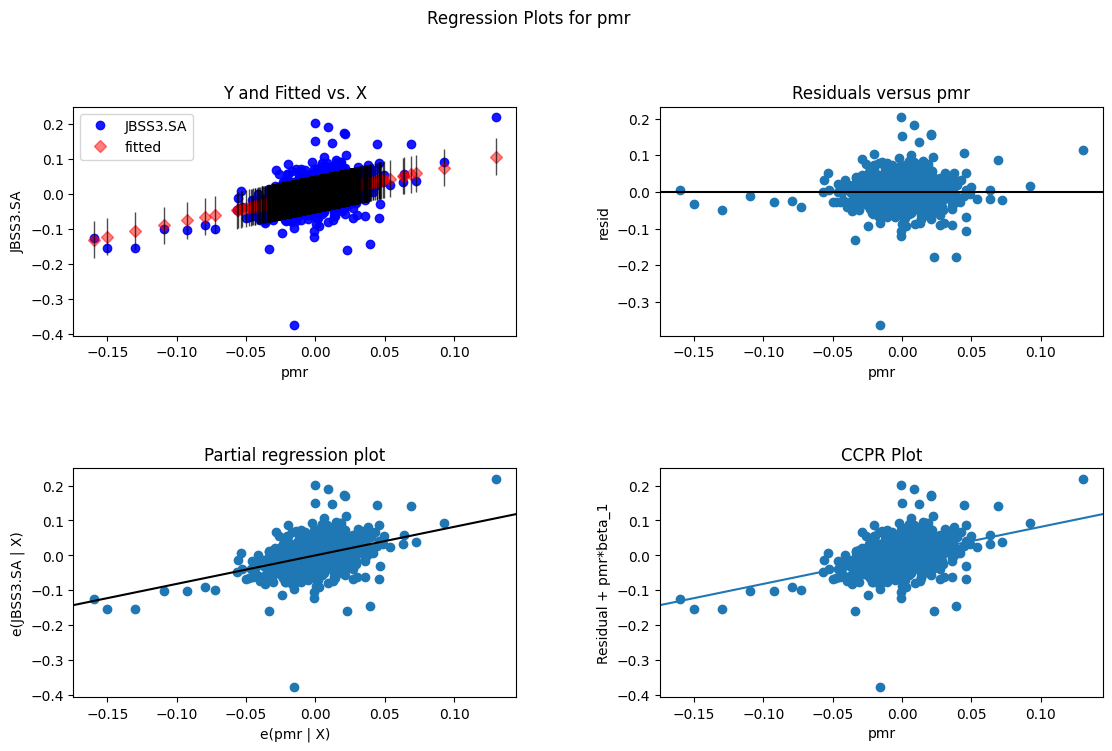

In [31]:
fig = sm.graphics.plot_regress_exog(lm, "pmr")
fig.tight_layout(pad=1.0)
fig.set_size_inches(12,8)

#### Gráficos da relação entre "pmr" e "JBSS3.SA" 
O código adicionado *fig = sm.graphics.plot_regress_exog(lm, "pmr")* gera um conjunto de gráficos que exploram a relação entre a variável independente "pmr" e a variável dependente "JBSS3.SA" no modelo de regressão linear ajustado *lm*, utilizando a função *plot_regress_exog* do pacote statsmodels.graphics. Esses gráficos são úteis para avaliar a adequação do modelo e identificar possíveis problemas, como não linearidade ou heterocedasticidade.

Analisando cada gráfico individualmente:

- Gráfico 1 - *Partial regression plot*:
    - Eixo horizontal: Variável independente "pmr"
    - Eixo vertical: Variável dependente "JBSS3.SA"
    - O gráfico mostra a relação parcial entre a variável dependente e a variável independente "pmr", controlando os efeitos das outras variáveis independentes. Ele representa a reta de regressão ajustada e mostra como a variável "pmr" influencia a variável "JBSS3.SA". A linha ajustada indica a relação linear entre as duas variáveis.

- Gráfico 2 - *CCPR plot*:
    - Eixo horizontal: Variável independente "pmr"
    - Eixo vertical: Valores residuais padronizados
    - O gráfico mostra a relação entre a variável independente "pmr" e os resíduos padronizados do modelo. Os resíduos padronizados são uma medida dos erros de previsão do modelo. 

- Gráfico 3 - *Added variable plot*:
    - Eixo horizontal: Variável independente "pmr"
    - Eixo vertical: Valores ajustados
    - O gráfico mostra a relação entre a variável independente "pmr" e os valores ajustados (predições) do modelo. Ele ilustra como a variável "pmr" contribui para a explicação da variabilidade da variável dependente. Há relação linear forte entre as duas variáveis,já que os pontos estejam distribuídos ao redor de uma linha reta.

- Gráfico 4 - *Residuals versus pmr*:
    - Eixo horizontal: Variável independente "pmr"
    - Eixo vertical: Valores residuais
    - O gráfico mostra a relação entre a variável independente "pmr" e os valores residuais do modelo. Os valores residuais são a diferença entre os valores observados e os valores preditos do modelo. Esse gráfico é usado para verificar a homocedasticidade dos resíduos, ou seja, se a variância dos resíduos é constante em diferentes níveis da variável independente. Como os pontos estão espalhados de forma aleatória em torno de zero, há uma suposta de homocedasticidade.

#### Teste de heterocedasticidade de Breusch-Pagan para Ação 1

In [33]:
name = ['Multiplicador de Lagrange - Teste Breusch e Pagan de Heterocedasticidade ', 
        'p-value', 'f-value', 'f: p-value']
test = sm.stats.het_breuschpagan(lm.resid, lm.model.exog)
lzip(name, test)

[('Multiplicador de Lagrange - Teste Breusch e Pagan de Heterocedasticidade ',
  2.777103099241371),
 ('p-value', 0.24943633925838962),
 ('f-value', 2.7778721384463334),
 ('f: p-value', 0.09568663627902979)]

#### Teste de heterocedasticidade de Breusch-Pagan para Ação 1
O resultado obtido ao executar o código sm.stats.het_breuschpagan(lm.resid, lm.model.exog) fornece informações sobre o teste de heterocedasticidade de Breusch-Pagan.

Aqui está a análise do resultado:

- "Multiplicador de Lagrange - Teste Breusch e Pagan de Heterocedasticidade": O valor do multiplicador de Lagrange, que é uma estatística usada no teste de heterocedasticidade. É um número que mede a presença de heterocedasticidade nos resíduos do modelo. Pelo valor apresentado a evidência de heterocedasticidade é baixa.

- "p-value": O valor-p associado ao teste de heterocedasticidade. É uma medida da significância estatística do teste. No caso apresentado, o valor-p é aproximadamente 0.2494, o que indica que não há evidências suficientes para rejeitar a hipótese nula de ausência de heterocedasticidade. Em outras palavras, não há uma forte evidência estatística de que os resíduos do modelo sejam heterocedásticos.

- "f-value": O valor da estatística F associada ao teste de heterocedasticidade. Essa estatística é calculada a partir do valor do multiplicador de Lagrange. O valor obtido é aproximadamente 2.7779.

- "f: p-value": O valor-p associado ao teste F de heterocedasticidade. Esse valor-p é calculado a partir do valor da estatística F e segue uma distribuição F. No caso apresentado, o valor-p é aproximadamente 0.0957, o que também indica que não há evidências suficientes para rejeitar a hipótese nula de ausência de heterocedasticidade.

Em resumo, com base nos resultados do teste de heterocedasticidade de Breusch-Pagan, não há evidências estatísticas significativas de que os resíduos do modelo sejam heterocedásticos. Isso sugere que a suposição de homocedasticidade (variância constante dos resíduos) é razoavelmente atendida pelo modelo de regressão linear ajustado.

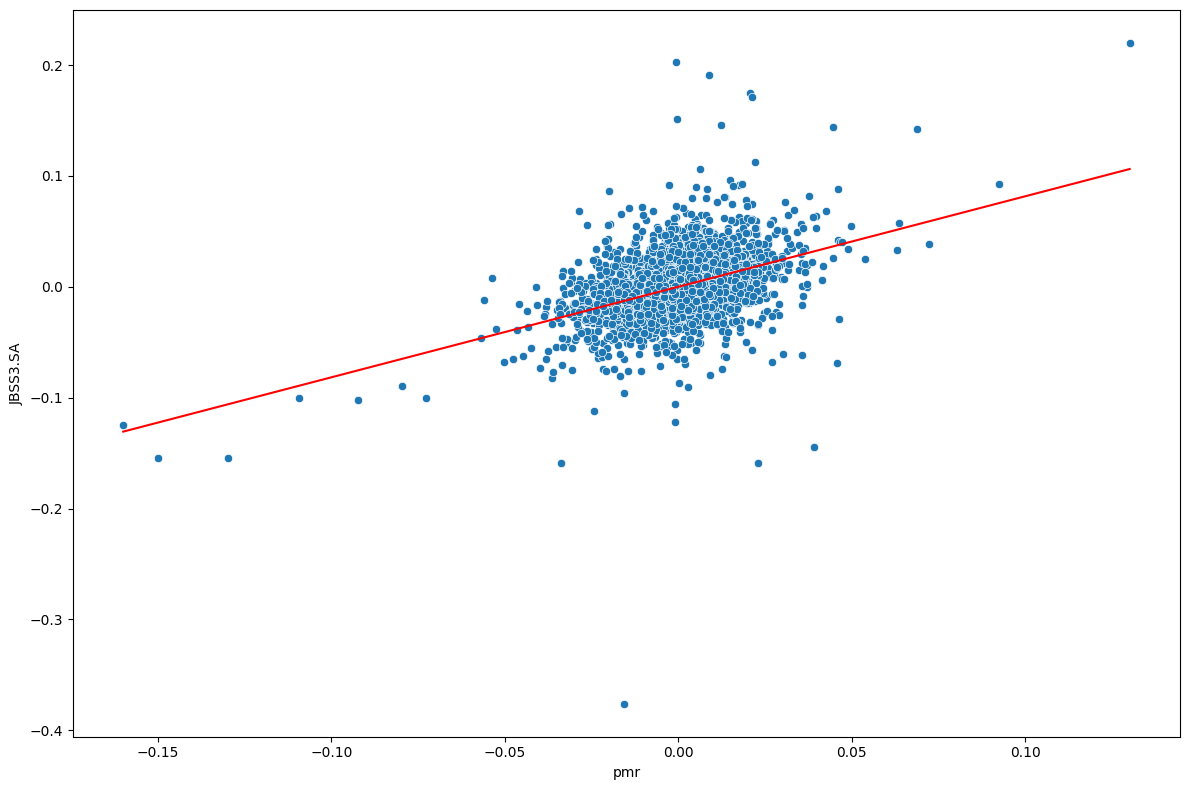

In [36]:
y_pred = 4.849e-08 + 0.8164 * x_with_mean['pmr']
# Plotando os dados em pontos
plt.figure(figsize=(12, 8), tight_layout=True)
sns.scatterplot(x=x_with_mean['pmr'], y=y)
# Plotando a linha
sns.lineplot(x=x_with_mean['pmr'],y=y_pred, color='red')
plt.show()

#### Matriz de gráficos de dispersão Ação 2

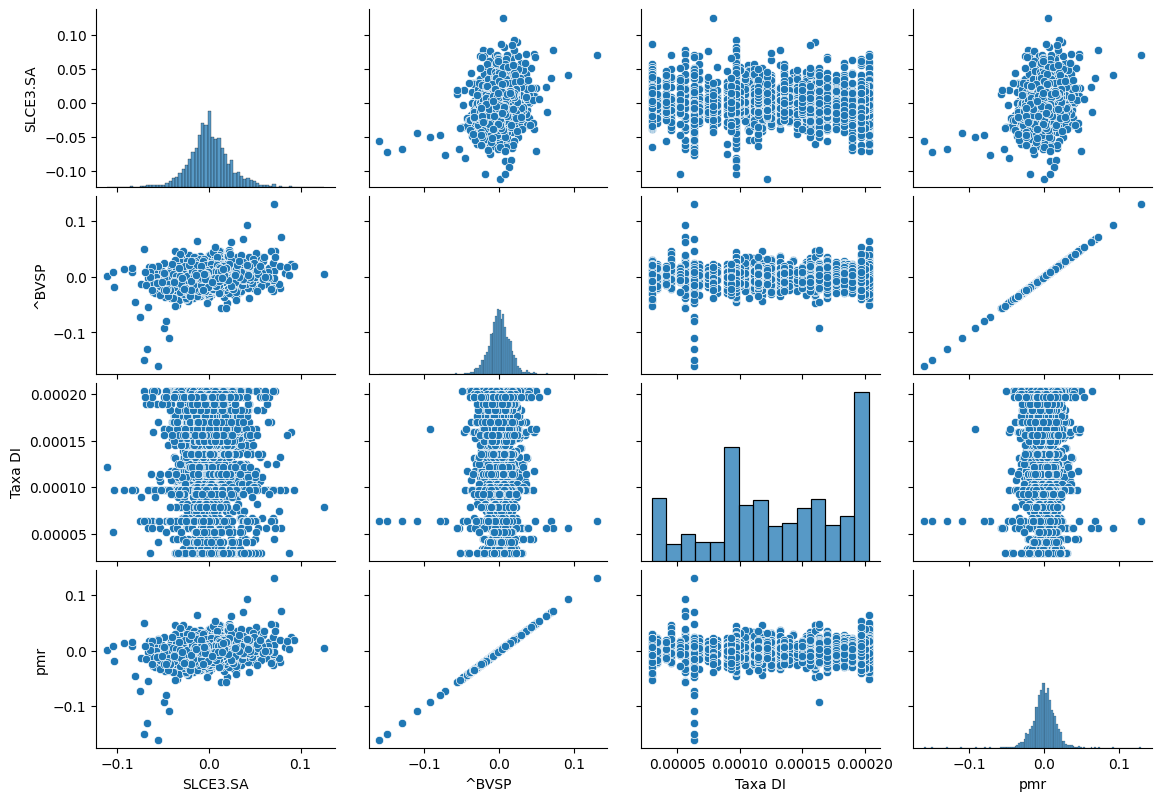

In [37]:
figure = sns.pairplot(dataset_2)
figure.fig.set_size_inches(12,8)

#### Gráfico de influência nos resultados da regressão da Ação 2

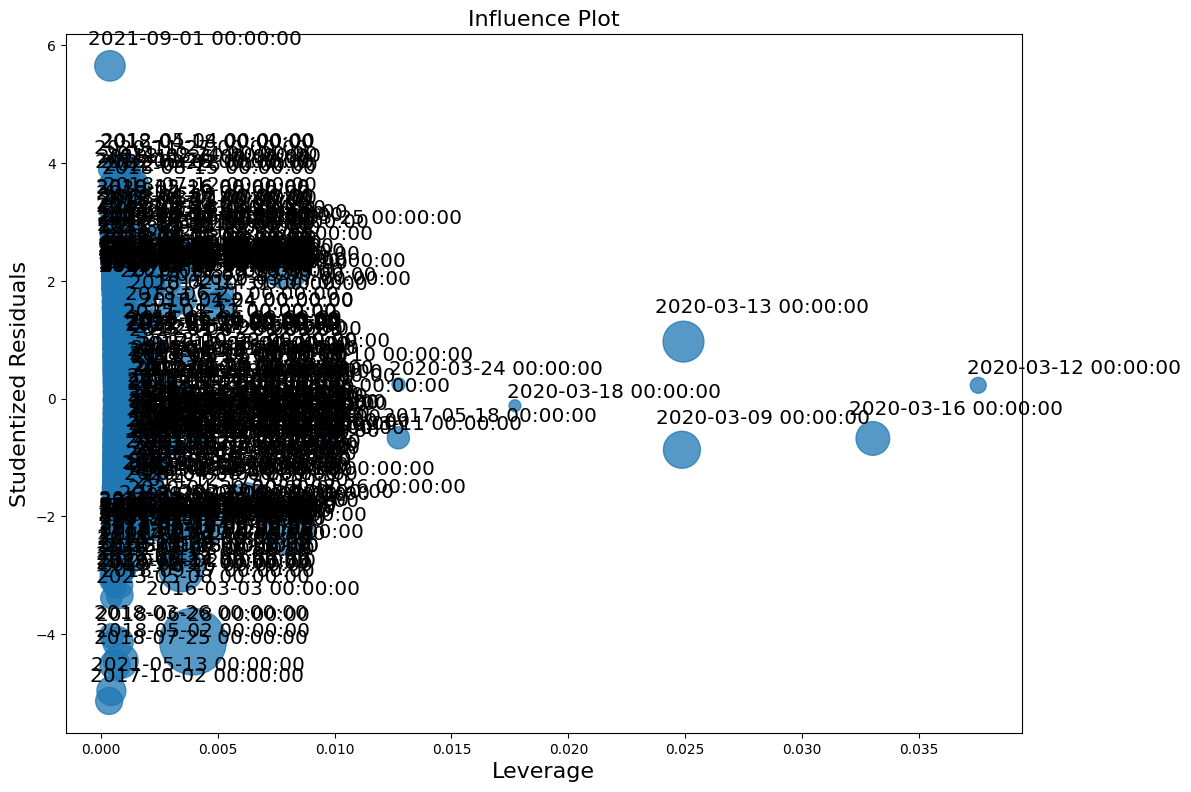

In [38]:
fig = sm.graphics.influence_plot(lm_2, criterion="cooks")
fig.set_size_inches(12, 8)
plt.tight_layout(pad=1.0)

#### Gráfico Gráficos de Regressão Parcial (Partial Regression Plot Grid) ação 2

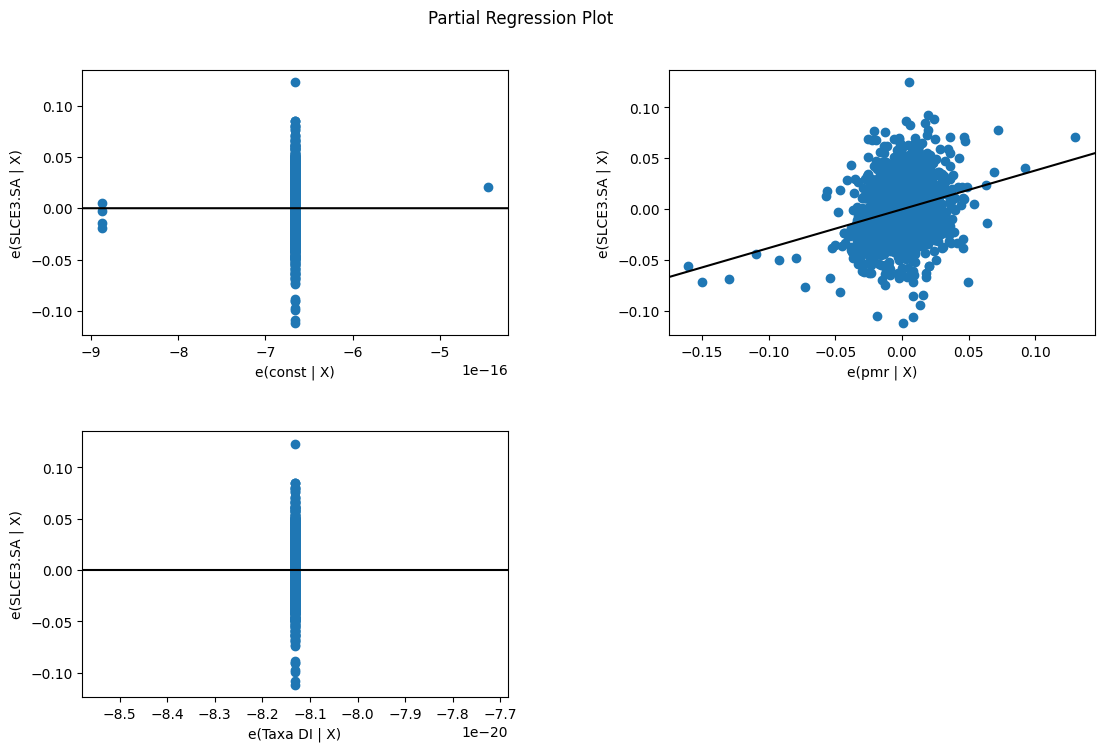

In [39]:
fig = sm.graphics.plot_partregress_grid(lm_2)
fig.tight_layout(pad=1.0)
fig.set_size_inches(12,8)

#### Gráficos da relação entre "pmr" e "SLCE3.SA.SA" 

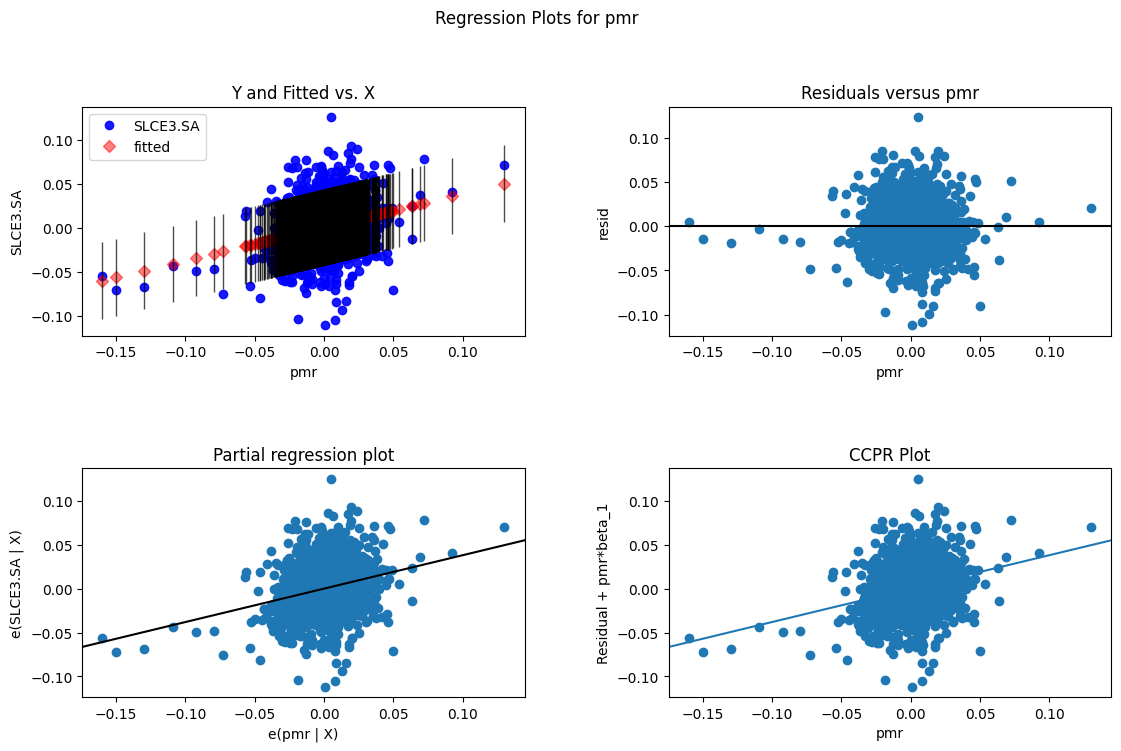

In [40]:
fig = sm.graphics.plot_regress_exog(lm_2, "pmr")
fig.tight_layout(pad=1.0)
fig.set_size_inches(12,8)

#### Teste de heterocedasticidade de Breusch-Pagan para Ação 2

In [41]:
name = ['Multiplicador de Lagrange - Teste Breusch e Pagan de Heterocedasticidade ', 
        'p-value', 'f-value', 'f: p-value']
test = sm.stats.het_breuschpagan(lm_2.resid, lm_2.model.exog)
lzip(name, test)

[('Multiplicador de Lagrange - Teste Breusch e Pagan de Heterocedasticidade ',
  3.394494270356078),
 ('p-value', 0.1831871199473308),
 ('f-value', 3.396181465081476),
 ('f: p-value', 0.06545291352700845)]

Aqui está a análise do resultado para Teste de heterocedasticidade de Breusch-Pagan para Ação 2:

- "Multiplicador de Lagrange - Teste Breusch e Pagan de Heterocedasticidade": O valor do multiplicador de Lagrange, que é uma estatística usada no teste de heterocedasticidade. O valor obtido é 3.3945, que é maior do que o valor obtido no primeiro teste (2.7771). Isso indica que há uma maior evidência de heterocedasticidade nos resíduos do segundo modelo em comparação com o primeiro modelo.

- "p-value": O valor-p associado ao teste de heterocedasticidade. O valor-p é aproximadamente 0.1832, o que indica que não há evidências suficientes para rejeitar a hipótese nula de ausência de heterocedasticidade no segundo modelo. Isso significa que, estatisticamente, não há uma forte evidência de heterocedasticidade nos resíduos do segundo modelo.

"f-value": O valor da estatística F associada ao teste de heterocedasticidade. O valor obtido é aproximadamente 3.3962.

"f: p-value": O valor-p associado ao teste F de heterocedasticidade. O valor-p é aproximadamente 0.0655, o que também indica que não há evidências suficientes para rejeitar a hipótese nula de ausência de heterocedasticidade no segundo modelo.

Em resumo, com base nos resultados do teste de heterocedasticidade de Breusch-Pagan para o segundo modelo (lm_2), não há evidências estatísticas significativas de que os resíduos desse modelo sejam heterocedásticos. No entanto, o valor do multiplicador de Lagrange é maior em comparação com o primeiro modelo, sugerindo uma possível presença de heterocedasticidade nos resíduos do segundo modelo, embora não estatisticamente significativa.

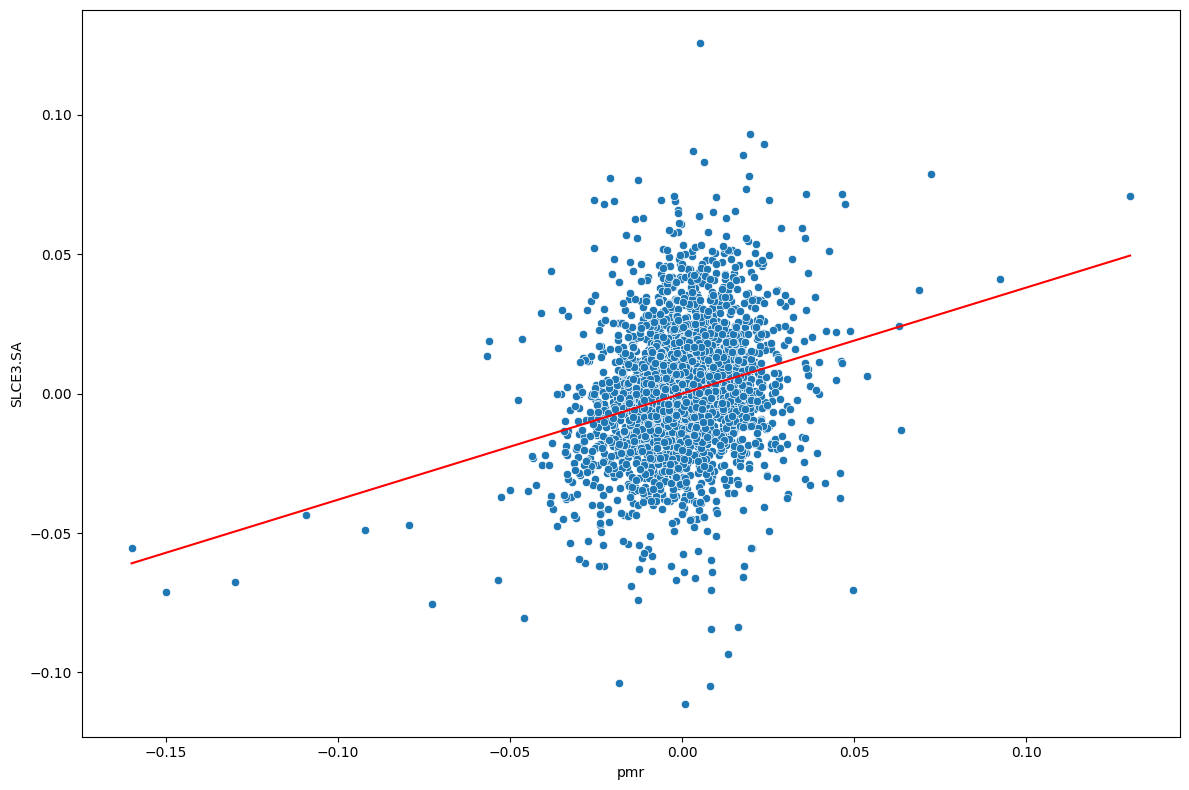

In [43]:
y_pred = 7.75e-08 + 0.3805 * x_with_mean_2['pmr']
# Plotando os dados em pontos
plt.figure(figsize=(12, 8), tight_layout=True)
sns.scatterplot(x=x_with_mean_2['pmr'], y=y_2)
# Plotando a linha
sns.lineplot(x=x_with_mean_2['pmr'],y=y_pred, color='red')
plt.show()